# Data Analysis for regression

### A notebook with data analysis of 52 anonymized features and target data

## Importing libraries and data, quick overview

In [51]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Printing 5 records:

In [52]:
df = pd.read_csv('internship_train.csv')
df.head(5)


0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2  429   49  481  111  111  146  8.602325  0.651162  1  430  ...  14.030257   
3  414  350  481  370  208  158  8.306624  0.424645  1  340  ...   2.789577   
4  318  359   20  218  317  301  8.124038  0.767304  1  212  ...   1.886560   

         45         46         47         48         49         50         51  \
0  0.870542   1.962937   7.466666  11.547794   8.822916   9.046424   7.895535   
1  7.168680   2.885415  12.413973  10.260494  10.091351   9.270888   3.173994   
2  0.394970   8.160625  12.592059   8.937577   2.265191  11.255721  12.794841   
3  6.416708  10.549814  11.456437   6.468099   2.519049   0.258284   9.317696   
4  1.919999   2.268203   0.149421   4.105907  10.416291   6.816217   8.586960   

          52     target  
0  11.010677  20.107472  
1  13.921871  61.763713  
2  12.080951  74.651162  
3   5.383098  69.424645  
4   4.512419  66.767304  

[5 rows x 54 columns]

Checking for NaNs:

Plotting correlation heatmap to see if there are any strong correlations within data:

In [53]:
total = df.isnull()
total.sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

There are no missing data. 

In [54]:
df.describe()

0             1             2             3             4  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.423944    250.236267    248.637289    249.736600    249.436178   
std      144.336393    144.022200    144.107577    144.284945    143.941581   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      125.000000    126.000000    124.000000    125.000000    125.000000   
50%      250.000000    251.000000    248.000000    250.000000    250.000000   
75%      374.000000    375.000000    374.000000    375.000000    373.000000   
max      499.000000    499.000000    499.000000    499.000000    499.000000   

                  5             6             7             8             9  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.656167     -0.011402      0.498548      0.499189    249.842033   
std      144.329168      7.038171      0.288682      0.500002    144.612718   
min        0.000000     -9.949874      0.000014      0.000000      0.000000   
25%      124.000000     -7.071068      0.248932      0.000000    124.000000   
50%      250.000000      0.000000      0.497136      0.000000    250.000000   
75%      374.000000      7.000000      0.747513      1.000000    376.000000   
max      499.000000      9.949874      0.999987      1.000000    499.000000   

       ...            44            45            46            47  \
count  ...  90000.000000  90000.000000  90000.000000  90000.000000   
mean   ...      7.475155      7.523962      7.508397      7.473322   
std    ...      4.330410      4.321537      4.331761      4.335692   
min    ...      0.000019      0.000040      0.000154      0.000083   
25%    ...      3.707544      3.797002      3.760627      3.715721   
50%    ...      7.474127      7.533987      7.505259      7.459774   
75%    ...     11.216585     11.276349     11.261971     11.215637   
max    ...     14.999900     14.999528     14.999733     14.999478   

                 48            49            50            51            52  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       7.490658      7.474578      7.509206      7.487159      7.513316   
std        4.332122      4.323035      4.326364      4.324876      4.333080   
min        0.000367      0.000014      0.000160      0.000147      0.000125   
25%        3.739358      3.715298      3.773381      3.743536      3.776322   
50%        7.494167      7.477270      7.512575      7.476564      7.506812   
75%       11.239232     11.210070     11.268156     11.234414     11.277835   
max       14.999869     14.999928     14.999948     14.999364     14.999775   

             target  
count  90000.000000  
mean      50.033981  
std       28.897243  
min        0.002634  
25%       25.091903  
50%       50.030705  
75%       75.059454  
max       99.999482  

[8 rows x 54 columns]

## Correlations

Checking correlations beetween features.
Visualising correaltions:

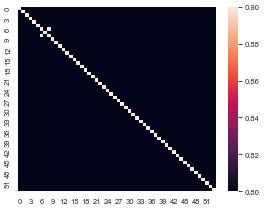

In [55]:
sns.heatmap(df.corr(), vmin=0.8, vmax=0.9)
plt.show()

Let's find all the features with correlation higher than 0.7:

In [56]:
# creating DataFrame with features correlations:
absolute_corr = df.corr().abs()
corr_df = absolute_corr.unstack()
corr_df = corr_df.sort_values(ascending=False)
corr_df = pd.DataFrame(corr_df).reset_index()
corr_df.rename(columns = {'level_0':'Feature_1', 'level_1': 'Feature_2'}, inplace= True)

high_corr_df = corr_df[(corr_df['Feature_1'] != corr_df['Feature_2']) & (corr_df[0] > 0.7)] 
print('Features with strong correlation: \n')
print(high_corr_df)



Features with strong correlation: 

   Feature_1 Feature_2         0
54         6         8  0.940016
55         8         6  0.940016


There is a strong correlation between feature 6 and 8.
It might by a good idea to choose only one of those features in the regression model.

Checking correlations between features and target:

In [57]:
other_corr_df = corr_df[(corr_df['Feature_1'] != corr_df['Feature_2']) & (corr_df['Feature_2']=='target')] 
print('Features vs \'target\' correlations: \n')
print(other_corr_df.to_string(index=False))

Features vs 'target' correlations: 

Feature_1 Feature_2        0
        7    target 0.012103
       40    target 0.007216
       26    target 0.006370
       39    target 0.006283
       35    target 0.006267
        1    target 0.005545
       50    target 0.005243
       31    target 0.005077
       29    target 0.004785
       51    target 0.004507
       25    target 0.004276
       38    target 0.003845
       41    target 0.003770
       28    target 0.003451
       10    target 0.003396
       44    target 0.003092
       17    target 0.002953
       42    target 0.002876
       21    target 0.002874
        3    target 0.002807
       36    target 0.002624
       49    target 0.002473
        0    target 0.002427
       33    target 0.002301
        5    target 0.002125
       12    target 0.002016
       15    target 0.001653
       37    target 0.001642
       11    target 0.001566
       19    target 0.001520
        9    target 0.001504
       27    target 0.001459
      

## Distributions

Plotting distributions of chosen variables (binary '8', highly correlated to '8' '6', ):

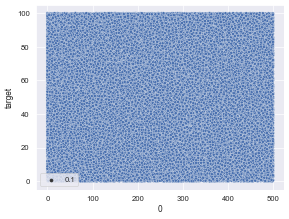

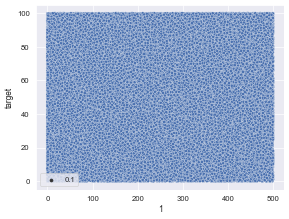

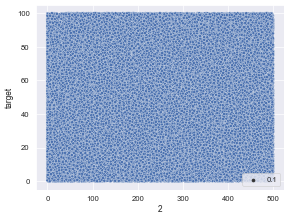

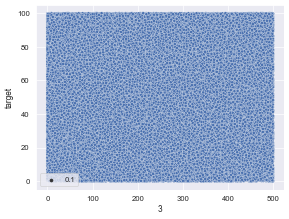

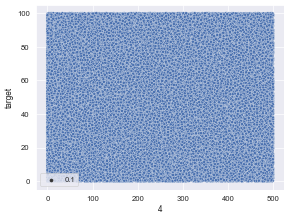

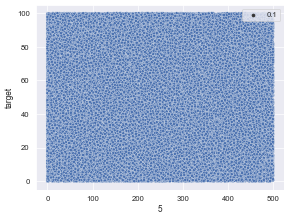

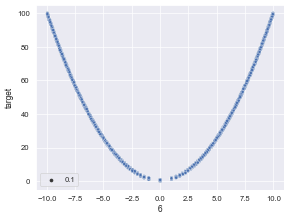

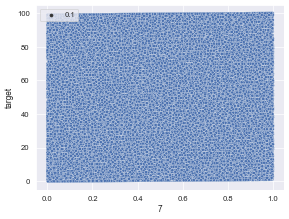

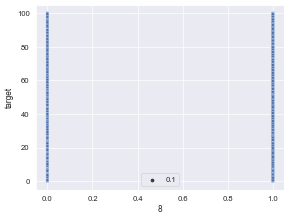

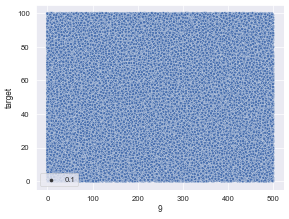

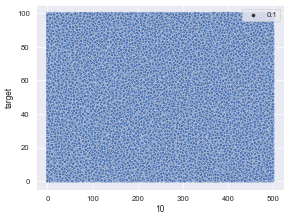

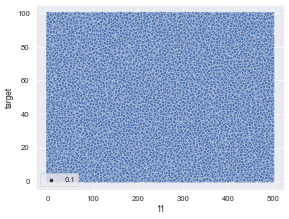

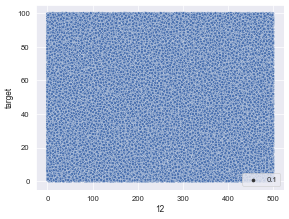

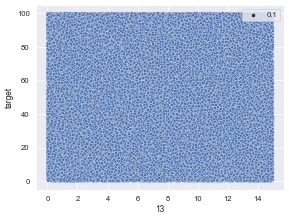

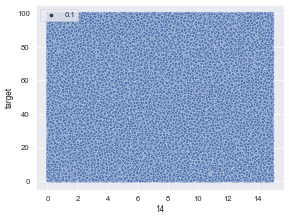

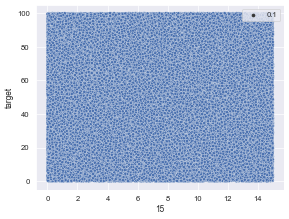

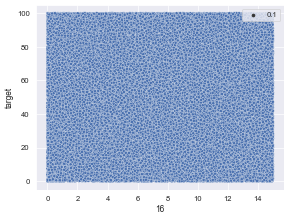

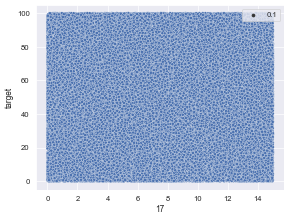

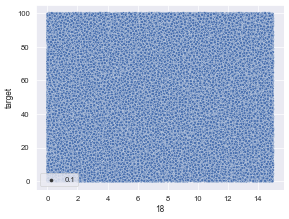

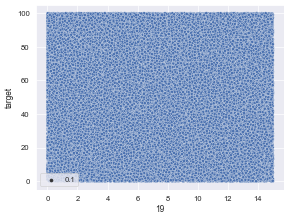

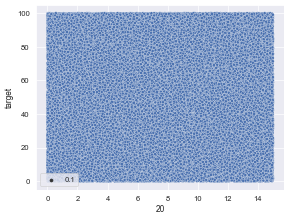

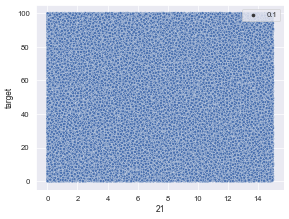

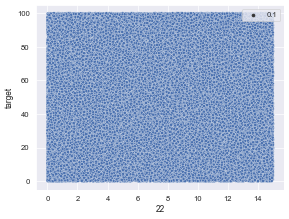

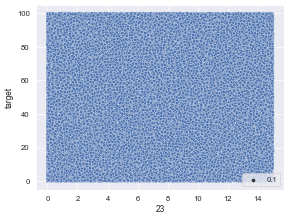

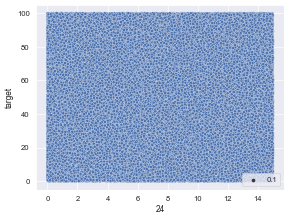

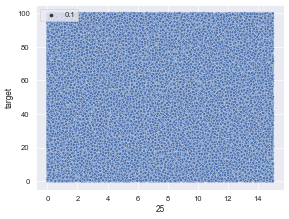

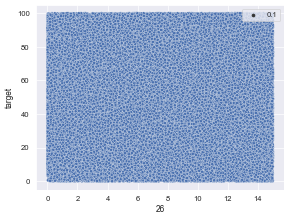

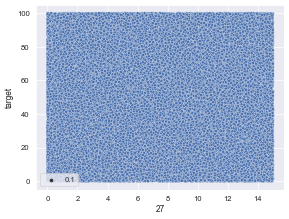

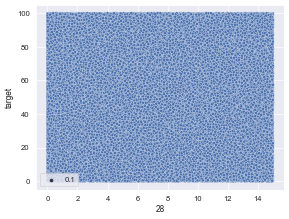

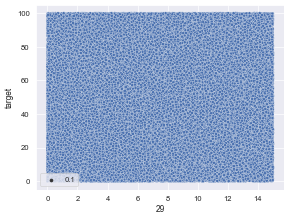

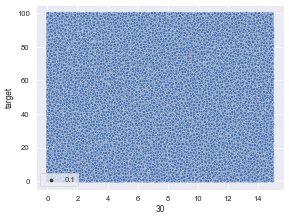

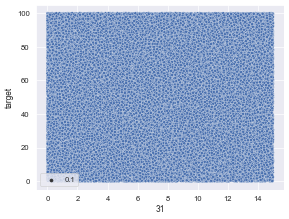

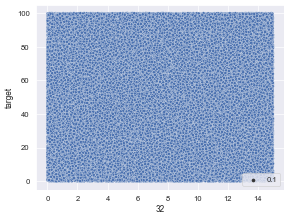

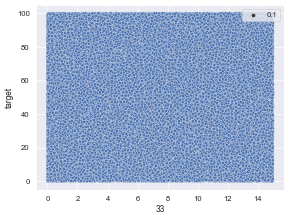

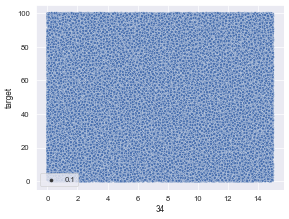

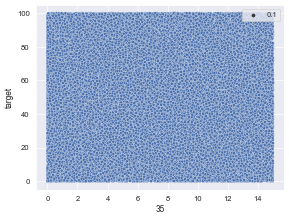

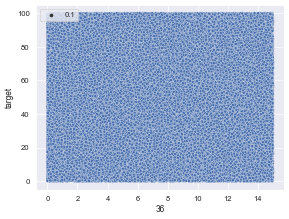

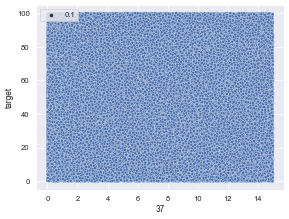

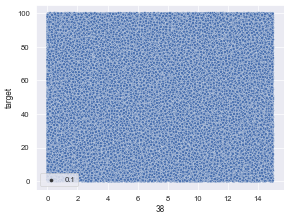

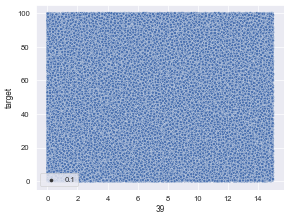

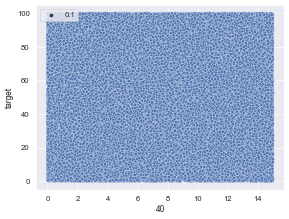

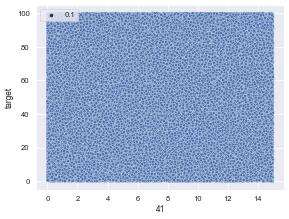

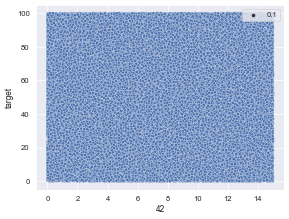

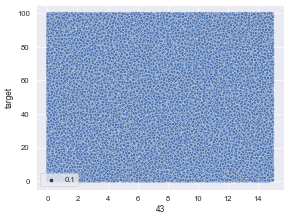

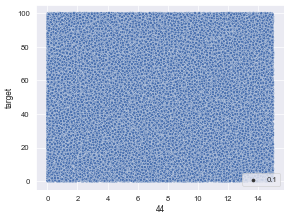

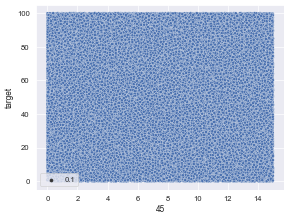

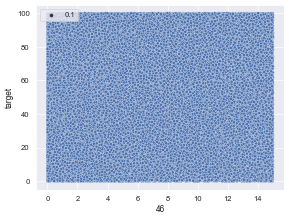

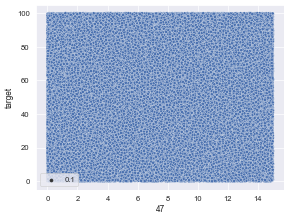

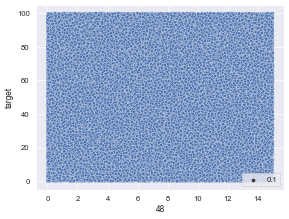

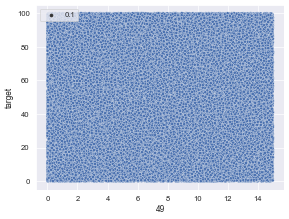

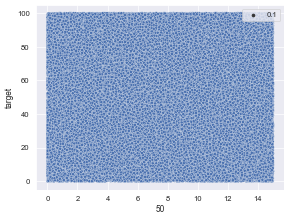

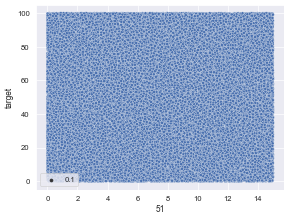

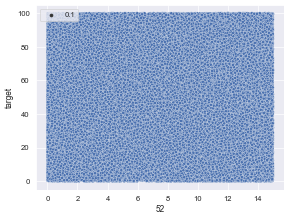

In [58]:
sns.set(rc={"figure.dpi":50, 'savefig.dpi':50})

for i in df.columns.drop('target'):
    sns.scatterplot(x=i, y='target', size=0.1, data=df)
    plt.show()

Plotting chosen distributions to to see more details:

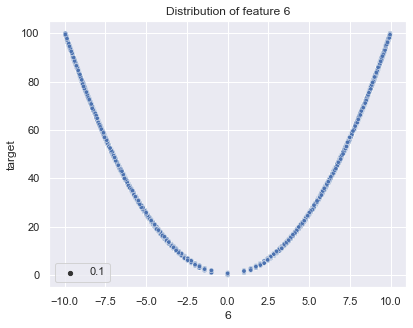

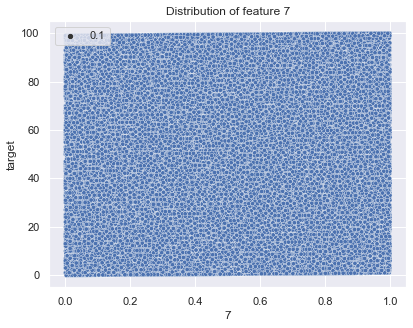

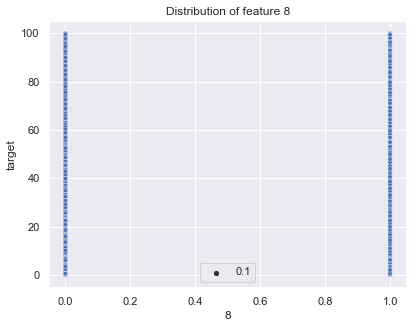

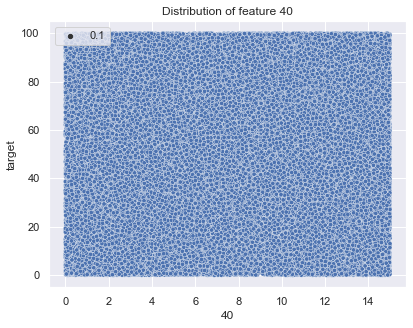

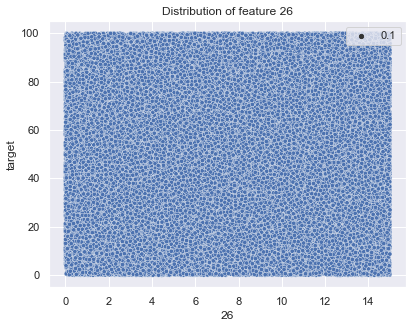

In [61]:
sns.set(rc={"figure.dpi":72, 'savefig.dpi':72})

to_plot = ['6', '7', '8', '40', '26']

for feature in to_plot:
    sns.scatterplot(x=feature, y='target', size=0.1, data=df).set_title('Distribution of feature '+feature)
    plt.show()

Feature '6' and output have a clearly visible quadratic correlation.
Most of the distributions looks rather noisy, there is only a minor order in the feature '7'. 
The are no outliers.

## Summary

- Feature '8' shloud not be included (it has a strong correlation with '6', also '8' is binary so it provides small amount of data for the model, while you '6' has a clear quadratic correlation with the output)
- The best choice for the ML alogirthm seems to be **second degree polynomial regression** with '6' as a feature and possibly other manually chosen features.